## Lesson1
 - import data
 - plot timeseries data 
 - scatterplot of attractors

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
os.chdir(r'D:\TimeSeriesLab/')
# #xM = np.loadtxt('./epileeg.dat')
xM = pd.read_csv('./epileeg.dat', header=None)
xM.head()


,0
0,1899.0
1,1287.0
2,1176.0
3,1645.0
4,2718.0


In [25]:
xM.describe(), xM.dtypes, xM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 1 columns):
0    3400 non-null float64
dtypes: float64(1)
memory usage: 26.6 KB


(                 0
 count  3400.000000
 mean   2028.591176
 std     402.976268
 min    1176.000000
 25%    1719.750000
 50%    1972.000000
 75%    2277.250000
 max    2933.000000, 0    float64
 dtype: object, None)

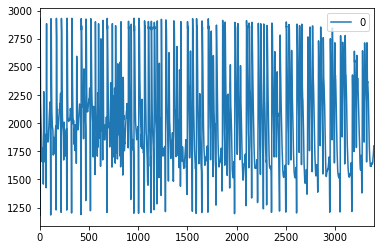

In [26]:
xM.plot()

## random noise ~ Φ(0,1)

(array([ 10.,  37., 103., 223., 286., 224.,  90.,  24.,   1.,   2.]),
 array([-3.05376438, -2.35252767, -1.65129096, -0.95005426, -0.24881755,
         0.45241916,  1.15365587,  1.85489258,  2.55612929,  3.257366  ,
         3.9586027 ]),
 <a list of 10 Patch objects>)

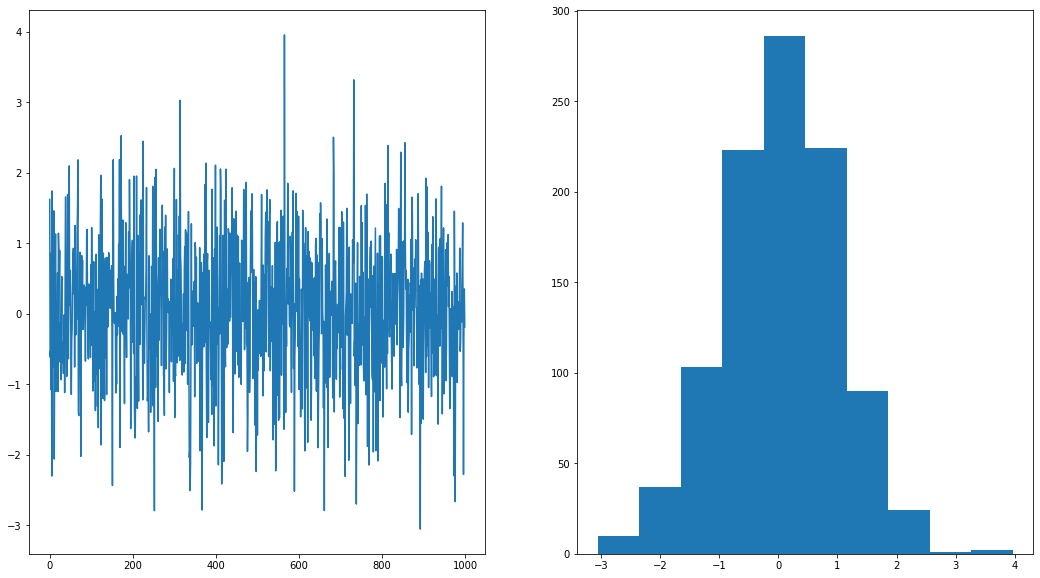

In [41]:
np.random.seed(1)
n = 1000
wM = np.random.normal(0, 1, size=n)
fig, ax = plt.subplots(1, 2, figsize=(18,10))
ax[0].plot(wM)
ax[1].hist(wM)

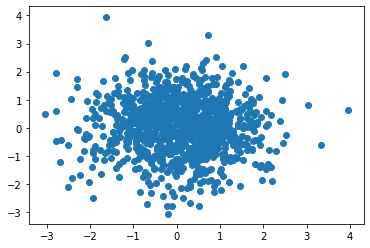

In [40]:
x_t = wM[:-1]
x_t1 = wM[1:]
plt.scatter(x_t, x_t1)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html
https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html


In [152]:
phiV = np.array([0.8])
thetaV = np.array([])
phiV = np.r_[1, -phiV] # #add zero lag and negate
thetaV = np.r_[1, thetaV] # add zero lag
arma_process = sm.tsa.ArmaProcess(phiV, thetaV)
xM = arma_process.generate_sample(1000)
xM = xM - np.mean(xM)

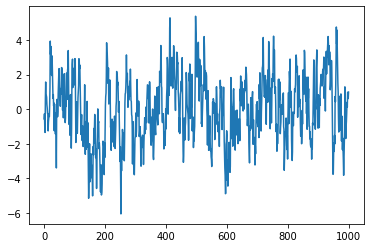

In [153]:
plt.plot(xM)

In [17]:
arma_process.arroots,arma_process.maroots, arma_process.acf(), arma_process.pacf(), arma_process.isinvertible, arma_process.isstationary 

(array([1.25]),
 array([], dtype=float64),
 array([1.00000000e+00, 8.00000000e-01, 6.40000000e-01, 5.12000000e-01,
        4.09600000e-01, 3.27680000e-01, 2.62144000e-01, 2.09715200e-01,
        1.67772160e-01, 1.34217728e-01, 1.07374182e-01, 8.58993459e-02,
        6.87194767e-02, 5.49755814e-02, 4.39804651e-02, 3.51843721e-02,
        2.81474977e-02, 2.25179981e-02, 1.80143985e-02, 1.44115188e-02,
        1.15292150e-02, 9.22337204e-03, 7.37869763e-03, 5.90295810e-03,
        4.72236648e-03, 3.77789319e-03, 3.02231455e-03, 2.41785164e-03,
        1.93428131e-03, 1.54742505e-03, 1.23794004e-03, 9.90352031e-04,
        7.92281625e-04, 6.33825300e-04, 5.07060240e-04, 4.05648192e-04,
        3.24518554e-04, 2.59614843e-04, 2.07691874e-04, 1.66153499e-04,
        1.32922800e-04, 1.06338240e-04, 8.50705917e-05, 6.80564734e-05,
        5.44451787e-05, 4.35561430e-05, 3.48449144e-05, 2.78759315e-05,
        2.23007452e-05, 1.78405962e-05, 1.42724769e-05, 1.14179815e-05,
        9.13438523e-0

In [154]:
proportion = 0.7
split_point = np.int(proportion*xM.shape[0])
train_set = xM[:split_point].reshape(-1, 1)
test_set = xM[split_point:].reshape(-1, 1)

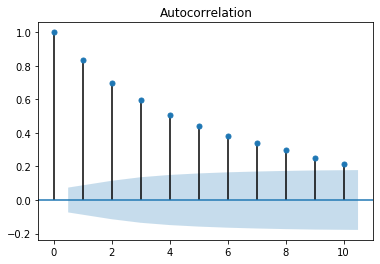

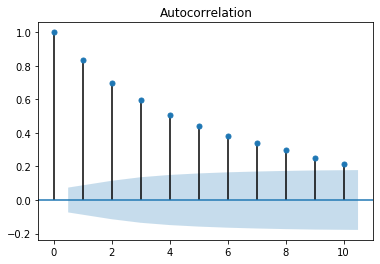

In [155]:
plot_acf(train_set, lags=10, alpha=0.05)

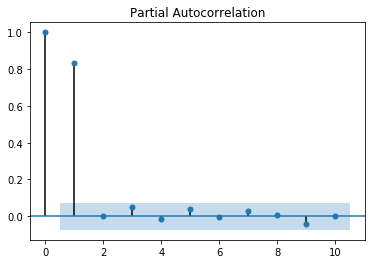

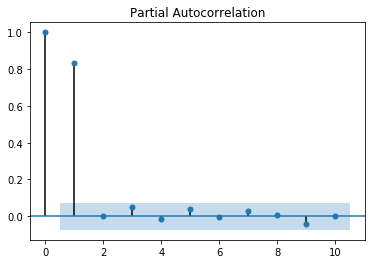

In [156]:
plot_pacf(train_set, lags=10, alpha=0.05)

In [218]:
p = 1
d = 0
q = 0
fit_model = ARIMA(train_set, order=(p, d, q)).fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1017.191
Date:                Fri, 19 Mar 2021   AIC                           2040.383
Time:                        17:57:55   BIC                           2054.036
Sample:                             0   HQIC                          2045.661
                                - 700                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1984      0.234     -0.848      0.396      -0.657       0.260
ar.L1          0.8326      0.021     39.752      0.000       0.792       0.874
sigma2         1.0689      0.055     19.275      0.000       0.960       1.178
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.99   Prob(JB):                         0.66
Heteroskedasticity (H):               1.06   Skew:                             0.05
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
fittedvalues = fit_model.fittedvalues
resid = fit_model.resid

(array([ 11.,  36.,  70., 129., 179., 152.,  77.,  33.,   9.,   4.]),
 array([-2.89294141, -2.25902128, -1.62510116, -0.99118104, -0.35726092,
         0.27665921,  0.91057933,  1.54449945,  2.17841957,  2.8123397 ,
         3.44625982]),
 <a list of 10 Patch objects>)

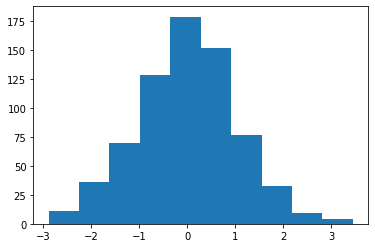

In [160]:
plt.hist(resid)

In [161]:
resid_correlation_test = fit_model.test_serial_correlation(method='ljungbox', lags=10)

In [162]:
statistic, pvalues = resid_correlation_test[0][0], resid_correlation_test[0][1]
pvalues


array([0.9927653 , 0.57455685, 0.65737582, 0.76324272, 0.82497002,
       0.901695  , 0.9432604 , 0.80875272, 0.8749159 , 0.9041814 ])

Text(0, 0.5, 'LjungBox test p-values')

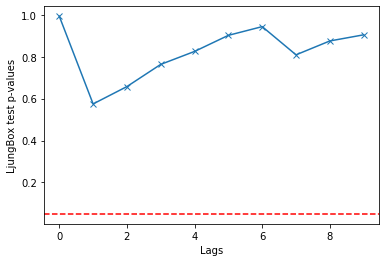

In [163]:
plt.plot(pvalues, marker='x')
plt.axhline(0.05, color='red', linestyle='--')
plt.xlabel('Lags')
plt.ylabel('LjungBox test p-values')

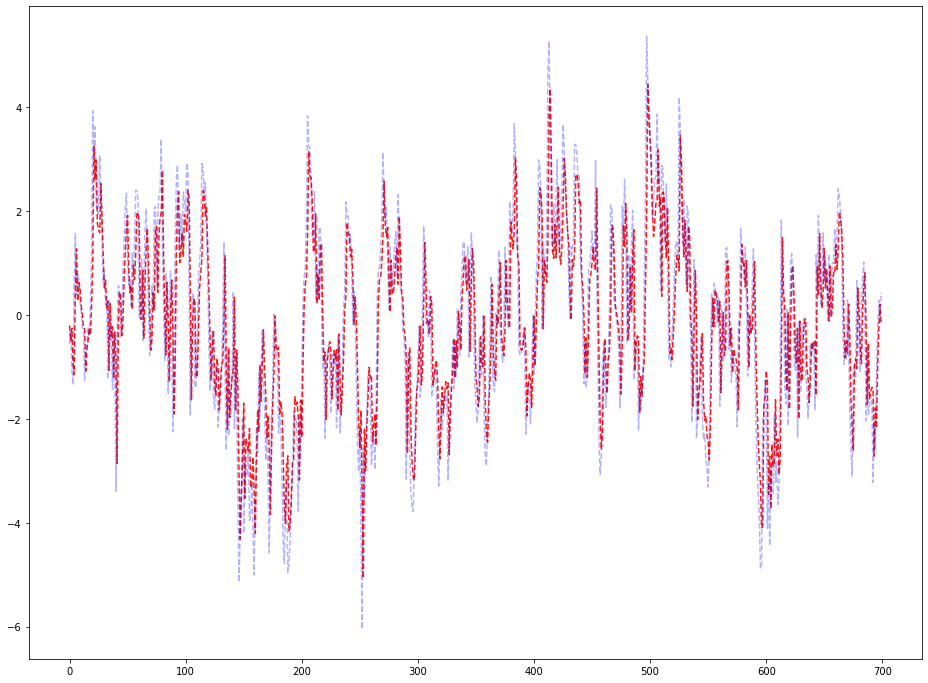

In [170]:
plt.figure(figsize=(16,12))
plt.plot(fittedvalues, color='red', alpha=0.9, linestyle='--')
plt.plot(train_set, color='blue', alpha=0.3, linestyle='--')


In [217]:
T=1
fit_yhat = fit_model.forecast(1)
fit_yhat = np.array(fit_yhat).reshape(-1, 1)
fit_y = train_set[T:]
nrmse = calculate_nrmse(true=fit_y, pred=fit_yhat)
nrmse

1.0386249919522648

In [216]:
fit_model.params, fit_y[0],fit_yhat[0],  fit_model.fittedvalues[0]*0.83261528-0.19844635, fit_y.shape, fit_yhat.shape

(array([-0.19844635,  0.83261528,  1.06892739]),
 array([-0.2677202]),
 array([0.32684421]),
 -0.36367581196627213,
 (699, 1),
 (699, 1))

In [189]:
def calculate_nrmse(true, pred):
    return np.sqrt(np.mean((true - pred)**2)) / np.std(true)


1.0001863280382743

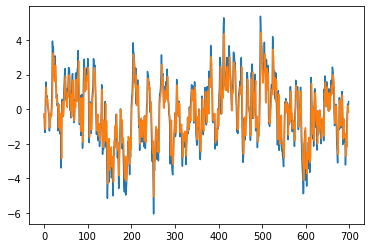

In [174]:
plt.plot(fit_y)
plt.plot(fit_yhat)

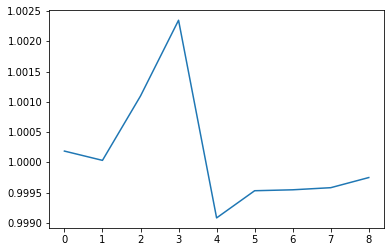

In [177]:
max_T = 10
nrmseV = np.full(shape=max_T, fill_value=np.nan)
for T in np.arange(1, max_T):
    fit_yhat = fit_model.predict(T, dynamic=True)
    fit_yhat = np.array(fit_yhat).reshape(-1, 1)
    fit_y = train_set[T:]
    nrmse = calculate_nrmse(true=fit_y, pred=fit_yhat)
    nrmseV[T-1] = nrmse
plt.plot(nrmseV)
    

- multistep prediction

In [ ]:
T=1
fit_yhat = fit_model.predict(T, dynamic=True)